**Trabalho:** Análise dos casos da COVID-19 em 5 cidades brasileiras - Atibaia, Bragança Paulista, Franco da Rocha, Guarulhos e Osasco - UF: SP

**Disciplina**: Linguagens de Programação para Ciência de Dados

**Discentes**: Bruna Mattioli de Oliveira e Gabriel Andrade Varga

<h3>Pacotes necessários</h3>

In [10]:
import psycopg2 as ps
import pandas.io.sql as sqlio
from datetime import datetime
from matplotlib import pyplot as plt
import csv
import pandas as pd
import numpy as np
import statistics

<h3>Criação da conexão no BD (PostgreSQL)

- Conexão no postgreSQL com o banco de dados Grupo_Beta

In [2]:
try:
    conn = ps.connect(user="postgres"
                        , password="vagan9ch"
                        , host="127.0.0.1"
                        , port="5432"
                        , database="grupo_beta")
    cursor = conn.cursor()
except(Exception, ps.Error) as error:
    print("Erro: ", error)

<h3>Criação de tabelas auxiliares com as informações da população do Estado de SP

Esta tabela será utilizada para a análise de mortalidade

In [3]:
lista_populacao_sp = []
with open('G:/My Drive/Especialização/Disciplinas/Módulo 2/Linguagens de Programação para Ciência de Dados/Trabalho LPCD/Bases/caso_full.csv',newline='', encoding='utf8', errors='ignore') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['place_type'] != 'city' or row['state'] != 'SP':
            continue
        else:
            if row['estimated_population'] == '':
                row['estimated_population'] = '0'
            if row['estimated_population_2019'] == '':
                row['estimated_population_2019'] = '0'
            lista_populacao_sp.append([row['estimated_population'], row['estimated_population_2019'], row['city']])

In [4]:
def remove_repetidos(lista):
    l = []
    for i in lista:
        if i not in l:
            l.append(i)
    l.sort()
    return l
lista_populacao_sp = remove_repetidos(lista_populacao_sp)

In [5]:
for i in lista_populacao_sp:
    if i[2] == 'Guarulhos':
        pop_cidade_guarulhos = int(i[1])
    if i[2] == 'Osasco':
        pop_cidade_oz = int(i[1])
    if i[2] == 'Atibaia':
        pop_cidade_atibaia = int(i[1])
    if i[2] == 'Franco da Rocha':
        pop_cidade_fr = int(i[1])
    if i[2] == 'Bragança Paulista':
        pop_cidade_bp = int(i[1])

<h3>Análise de Dados da Cidade de Atibaia - SP

- ***Criação dos Gráficos da quantidade de casos e de óbitos do município de Atibaia - SP.***

Extração dos dados de óbitos direto do Banco de Dados e criação de campos extras para a visualização mensal dos dados.

In [6]:
atib_obitos = "SELECT EXTRACT(MONTH FROM data_dado) as mes, EXTRACT(YEAR FROM data_dado) as ano, SUM(novos_obitos) FROM obitos AS o, data_dado AS d, cidade as c WHERE o.id_data_dado = d.id_data_dado AND o.id_cidade = c.id_cidade AND nome_cidade = 'Atibaia' GROUP BY EXTRACT(MONTH FROM data_dado), EXTRACT(YEAR FROM data_dado) ORDER BY 2,1;"
cursor.execute(atib_obitos)
atibaia_obitos = cursor.fetchall()
lista_data_atibaia = []
lista_obitos_atibaia = []
for item in atibaia_obitos:
    data_str = str(int(item[0]))+'/'+str(int(item[1]))
    lista_data_atibaia.append(data_str)
    lista_obitos_atibaia.append(item[2])

Extração dos dados de óbitos direto do Banco de Dados

In [7]:
atib_casos = "SELECT EXTRACT(MONTH FROM data_dado) as mes, EXTRACT(YEAR FROM data_dado) as ano, SUM(novos_casos) FROM casos AS o, data_dado AS d, cidade as c WHERE o.id_data_dado = d.id_data_dado AND o.id_cidade = c.id_cidade AND nome_cidade = 'Atibaia' GROUP BY EXTRACT(MONTH FROM data_dado), EXTRACT(YEAR FROM data_dado) ORDER BY 2,1;"
cursor.execute(atib_casos)
atibaia_casos = cursor.fetchall()
lista_data_atibaia = []
lista_casos_atibaia = []
for item in atibaia_casos:
    data_str = str(int(item[0]))+'/'+str(int(item[1]))
    lista_data_atibaia.append(data_str)
    lista_casos_atibaia.append(item[2])

Criação dos Gráficos de Casos e de Óbitos na cidade de Atibaia

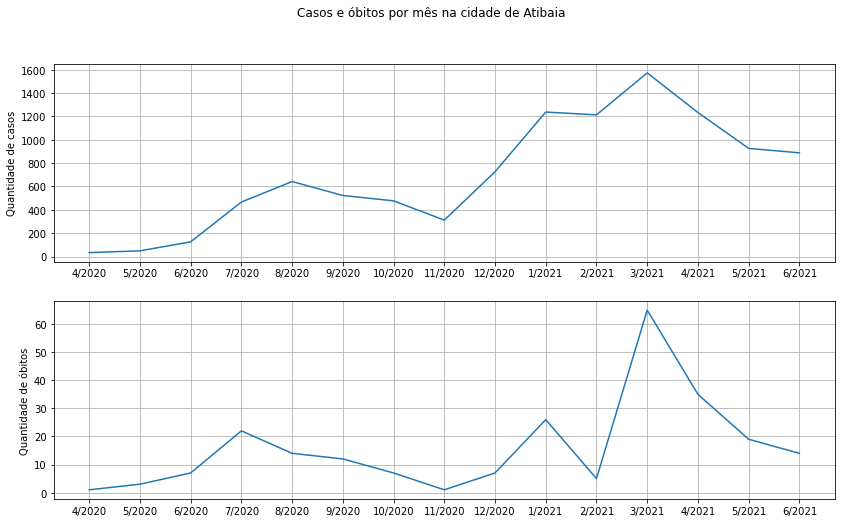

In [8]:
plt.rcParams['figure.figsize'] = (14,8)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(lista_data_atibaia, lista_casos_atibaia)
ax1.set_ylabel('Quantidade de casos')
ax2.plot(lista_data_atibaia, lista_obitos_atibaia)
ax2.set_ylabel('Quantidade de óbitos')
fig.suptitle('Casos e óbitos por mês na cidade de Atibaia')
ax1.grid(True)
ax2.grid(True)

- ***Criação dos Gráficos da quantidade acumulada de casos e de óbitos do município de Atibaia - SP.***

Looping para criação da coluna de casos acumulados

In [14]:
i = 1
acumulado_casos_atibaia = []
acumulado_casos_atibaia.append(lista_casos_atibaia[0])
while i < len(lista_casos_atibaia):
    acumulado_casos_atibaia.append(lista_casos_atibaia[i]+acumulado_casos_atibaia[i-1])
    i +=1
print(acumulado_casos_atibaia)

[34, 83, 209, 676, 1318, 1841, 2318, 2630, 3356, 4593, 5806, 7378, 8611, 9537, 10425]


Looping para criação da coluna de óbitos acumulados

In [15]:
i = 1
acumulado_obitos_atibaia = []
acumulado_obitos_atibaia.append(lista_obitos_atibaia[0])
while i < len(lista_obitos_atibaia):
    acumulado_obitos_atibaia.append(lista_obitos_atibaia[i]+acumulado_obitos_atibaia[i-1])
    i +=1
print(acumulado_obitos_atibaia)

[1, 4, 11, 33, 47, 59, 66, 67, 74, 100, 105, 170, 205, 224, 238]


Criação dos Gráficos Acumulados de Casos e de Óbitos na cidade de Atibaia

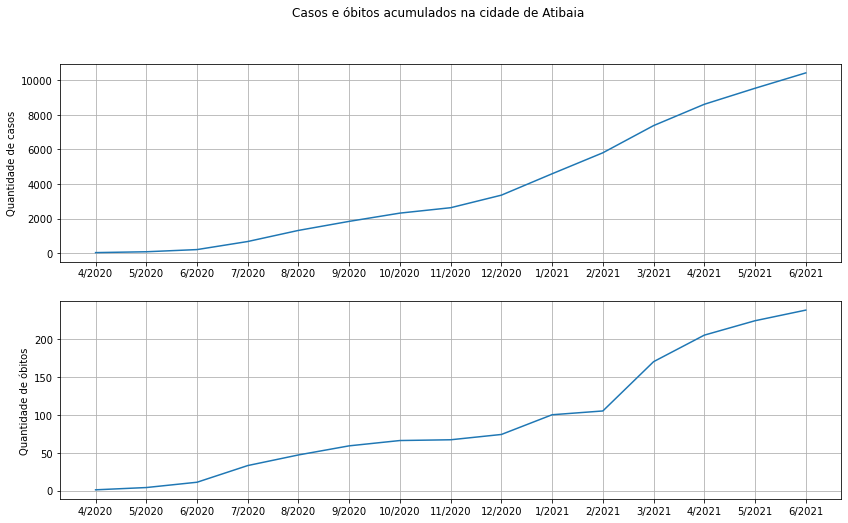

In [16]:
plt.rcParams['figure.figsize'] = (14,8)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(lista_data_atibaia, acumulado_casos_atibaia)
ax1.set_ylabel('Quantidade de casos')
ax2.plot(lista_data_atibaia, acumulado_obitos_atibaia)
ax2.set_ylabel('Quantidade de óbitos')
fig.suptitle('Casos e óbitos acumulados na cidade de Atibaia')
ax1.grid(True)
ax2.grid(True)

- ***Estatísticas básicas da quantidade de casos e de óbitos do município de Atibaia - SP.***

Média mensal da quantidade de casos

In [13]:
statistics.mean(lista_casos_atibaia)

695

Média mensal da quantidade de óbitos

In [12]:
statistics.mean(lista_obitos_atibaia)

15.866666666666667

Total de casos e óbitos confirmados

In [90]:
casos_total_atibaia = acumulado_casos_atibaia[-1]
obitos_total_atibaia = acumulado_obitos_atibaia[-1]

print(casos_total_atibaia)
print(obitos_total_atibaia)

10425
238


% da população que contraiu 

In [20]:
risco_caso_atibaia = (casos_total_atibaia / pop_cidade_atibaia) * 100
risco_caso_atibaia

7.302414524975307

Cálculo da Mortalidade

In [23]:
mortalidade_atibaia = (obitos_total_atibaia / pop_cidade_atibaia) * 100
mortalidade_atibaia

0.1667121973087888

Cálculo da Letalidade

In [22]:
letalidade_atibaia = (obitos_total_atibaia / casos_total_atibaia) * 100
letalidade_atibaia

2.2829736211031175

<h3>Análise de Dados da Cidade de Osasco - SP</h3>

- ***Criação dos Gráficos da quantidade de casos e de óbitos do município de Osasco - SP.***

Extração dos dados de óbitos direto do Banco de Dados e criação de campos extras para a visualização mensal dos dados.

In [26]:
osasco_obitos = "SELECT EXTRACT(MONTH FROM data_dado) as mes, EXTRACT(YEAR FROM data_dado) as ano, SUM(novos_obitos) FROM obitos AS o, data_dado AS d, cidade as c WHERE o.id_data_dado = d.id_data_dado AND o.id_cidade = c.id_cidade AND nome_cidade = 'Osasco' GROUP BY EXTRACT(MONTH FROM data_dado), EXTRACT(YEAR FROM data_dado) ORDER BY 2,1;"
cursor.execute(osasco_obitos)
oz_obitos = cursor.fetchall()
lista_data_oz = []
lista_obitos_oz = []
for item in oz_obitos:
    data_str = str(int(item[0]))+'/'+str(int(item[1]))
    lista_data_oz.append(data_str)
    lista_obitos_oz.append(item[2])

Extração dos dados de casos direto do Banco de Dados

In [27]:
osasco_casos = "SELECT EXTRACT(MONTH FROM data_dado) as mes, EXTRACT(YEAR FROM data_dado) as ano, SUM(novos_casos) FROM casos AS o, data_dado AS d, cidade as c WHERE o.id_data_dado = d.id_data_dado AND o.id_cidade = c.id_cidade AND nome_cidade = 'Osasco' GROUP BY EXTRACT(MONTH FROM data_dado), EXTRACT(YEAR FROM data_dado) ORDER BY 2,1;"
cursor.execute(osasco_casos)
oz_casos = cursor.fetchall()
lista_data_oz = []
lista_casos_oz = []
for item in oz_casos:
    data_str = str(int(item[0]))+'/'+str(int(item[1]))
    lista_data_oz.append(data_str)
    lista_casos_oz.append(item[2])

Criação dos Gráficos de Casos e de Óbitos na cidade de Osasco

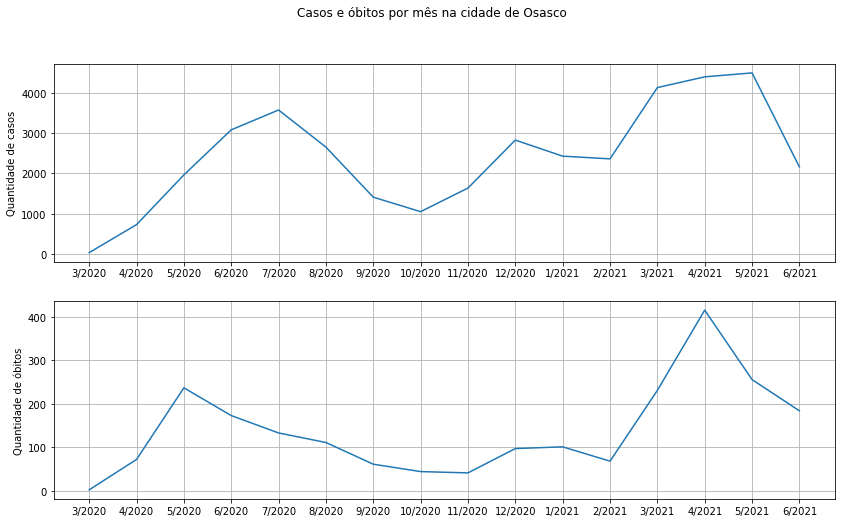

In [28]:
plt.rcParams['figure.figsize'] = (14,8)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(lista_data_oz, lista_casos_oz)
ax1.set_ylabel('Quantidade de casos')
ax2.plot(lista_data_oz, lista_obitos_oz)
ax2.set_ylabel('Quantidade de óbitos')
fig.suptitle('Casos e óbitos por mês na cidade de Osasco')
ax1.grid(True)
ax2.grid(True)

- ***Criação dos Gráficos da quantidade acumulada de casos e de óbitos do município de Osasco - SP.***

Looping para criação da coluna de casos acumulados

In [29]:
i = 1
acumulado_casos_oz = []
acumulado_casos_oz.append(lista_casos_oz[0])
while i < len(lista_casos_oz):
    acumulado_casos_oz.append(lista_casos_oz[i]+acumulado_casos_oz[i-1])
    i +=1
print(acumulado_casos_oz)

[33, 762, 2727, 5812, 9390, 12045, 13456, 14507, 16145, 18975, 21406, 23769, 27904, 32306, 36806, 38969]


Looping para criação da coluna de óbitos acumulados

In [30]:
i = 1
acumulado_obitos_oz = []
acumulado_obitos_oz.append(lista_obitos_oz[0])
while i < len(lista_obitos_oz):
    acumulado_obitos_oz.append(lista_obitos_oz[i]+acumulado_obitos_oz[i-1])
    i +=1
print(acumulado_obitos_oz)

[2, 74, 311, 484, 617, 728, 789, 833, 874, 971, 1072, 1140, 1371, 1787, 2043, 2227]


Criação dos Gráficos Acumulados de Casos e de Óbitos na cidade de Osasco

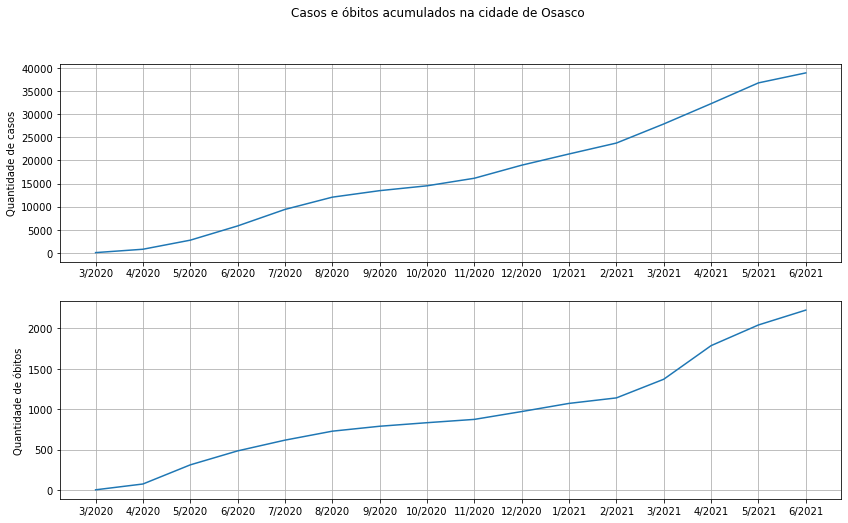

In [31]:
plt.rcParams['figure.figsize'] = (14,8)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(lista_data_oz, acumulado_casos_oz)
ax1.set_ylabel('Quantidade de casos')
ax2.plot(lista_data_oz, acumulado_obitos_oz)
ax2.set_ylabel('Quantidade de óbitos')
fig.suptitle('Casos e óbitos acumulados na cidade de Osasco')
ax1.grid(True)
ax2.grid(True)

- ***Estatísticas básicas da quantidade de casos e de óbitos do município de Osasco - SP.***

Média mensal da quantidade de casos

In [33]:
statistics.mean(lista_casos_oz)

2435.5625

Média mensal da quantidade de óbitos

In [34]:
statistics.mean(lista_obitos_oz)

139.1875

Total de casos e óbitos confirmados

In [91]:
casos_total_oz = acumulado_casos_oz[-1]
obitos_total_oz = acumulado_obitos_oz[-1]

print(casos_total_oz)
print(obitos_total_oz)

38969
2227


% da população que contraiu COVID-19

In [36]:
risco_caso_oz = (casos_total_oz / pop_cidade_oz) * 100
risco_caso_oz

5.57960991841562

Cálculo da Mortalidade

In [37]:
mortalidade_oz = (obitos_total_oz / pop_cidade_oz) * 100
mortalidade_oz

0.3188634886271545

Cálculo da Letalidade

In [38]:
letalidade_oz = (obitos_total_oz / casos_total_oz) * 100
letalidade_oz

5.714798942749365

<h3>Análise de Dados da Cidade de Guarulhos - SP</h3>

- ***Criação dos Gráficos da quantidade de casos e de óbitos do município de Guarulhos - SP.***

Extração dos dados de óbitos direto do Banco de Dados e criação de campos extras para a visualização mensal dos dados.

In [39]:
guarulhos_obitos = "SELECT EXTRACT(MONTH FROM data_dado) as mes, EXTRACT(YEAR FROM data_dado) as ano, SUM(novos_obitos) FROM obitos AS o, data_dado AS d, cidade as c WHERE o.id_data_dado = d.id_data_dado AND o.id_cidade = c.id_cidade AND nome_cidade = 'Guarulhos' GROUP BY EXTRACT(MONTH FROM data_dado), EXTRACT(YEAR FROM data_dado) ORDER BY 2,1;"
cursor.execute(guarulhos_obitos)
guarulhos_obitos = cursor.fetchall()
lista_data_guarulhos = []
lista_obitos_guarulhos = []
for item in guarulhos_obitos:
    data_str = str(int(item[0]))+'/'+str(int(item[1]))
    lista_data_guarulhos.append(data_str)
    lista_obitos_guarulhos.append(item[2])

Extração dos dados de casos direto do Banco de Dados

In [40]:
guarulhos_casos = "SELECT EXTRACT(MONTH FROM data_dado) as mes, EXTRACT(YEAR FROM data_dado) as ano, SUM(novos_casos) FROM casos AS o, data_dado AS d, cidade as c WHERE o.id_data_dado = d.id_data_dado AND o.id_cidade = c.id_cidade AND nome_cidade = 'Guarulhos' GROUP BY EXTRACT(MONTH FROM data_dado), EXTRACT(YEAR FROM data_dado) ORDER BY 2,1;"
cursor.execute(guarulhos_casos)
guarulhos_casos = cursor.fetchall()
lista_data_guarulhos = []
lista_casos_guarulhos = []
for item in guarulhos_casos:
    data_str = str(int(item[0]))+'/'+str(int(item[1]))
    lista_data_guarulhos.append(data_str)
    lista_casos_guarulhos.append(item[2])

Criação dos Gráficos de Casos e de Óbitos na cidade de Guarulhos

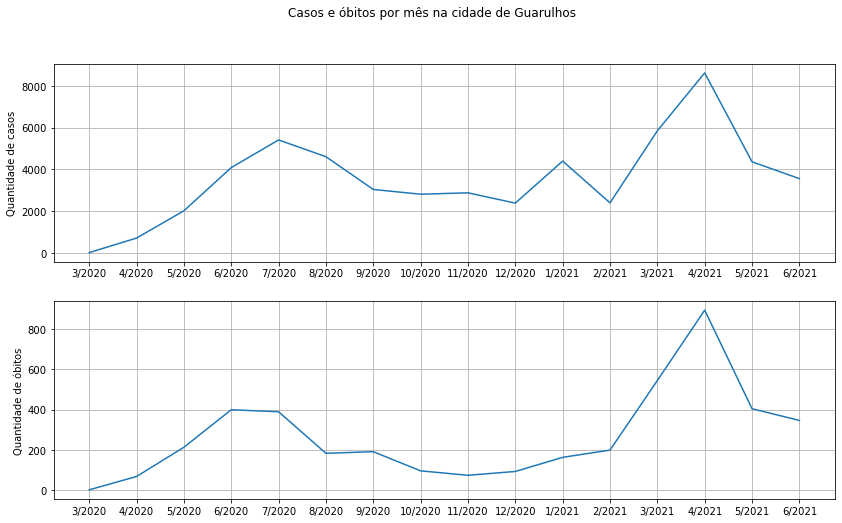

In [41]:
plt.rcParams['figure.figsize'] = (14,8)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(lista_data_guarulhos, lista_casos_guarulhos)
ax1.set_ylabel('Quantidade de casos')
ax2.plot(lista_data_guarulhos, lista_obitos_guarulhos)
ax2.set_ylabel('Quantidade de óbitos')
fig.suptitle('Casos e óbitos por mês na cidade de Guarulhos')
ax1.grid(True)
ax2.grid(True)

- ***Criação dos Gráficos da quantidade acumulada de casos e de óbitos do município de Guarulhos - SP.***

Looping para criação da coluna de casos acumulados

In [42]:
i = 1
acumulado_casos_guarulhos = []
acumulado_casos_guarulhos.append(lista_casos_guarulhos[0])
while i < len(lista_casos_guarulhos):
    acumulado_casos_guarulhos.append(lista_casos_guarulhos[i]+acumulado_casos_guarulhos[i-1])
    i +=1
print(acumulado_casos_guarulhos)

[21, 737, 2757, 6843, 12251, 16858, 19899, 22712, 25592, 27979, 32377, 34777, 40622, 49236, 53599, 57158]


Looping para criação da coluna de óbitos acumulados

In [43]:
i = 1
acumulado_obitos_guarulhos = []
acumulado_obitos_guarulhos.append(lista_obitos_guarulhos[0])
while i < len(lista_casos_guarulhos):
    acumulado_obitos_guarulhos.append(lista_obitos_guarulhos[i]+acumulado_obitos_guarulhos[i-1])
    i +=1
print(acumulado_obitos_guarulhos)

[2, 70, 283, 682, 1071, 1254, 1445, 1541, 1615, 1708, 1871, 2070, 2614, 3507, 3911, 4257]


Criação dos Gráficos Acumulados de Casos e de Óbitos na cidade de Osasco

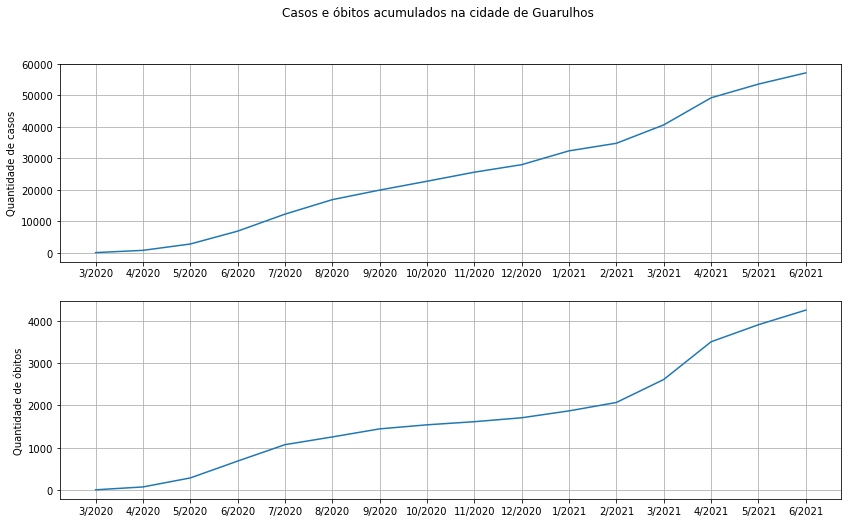

In [44]:
plt.rcParams['figure.figsize'] = (14,8)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(lista_data_guarulhos, acumulado_casos_guarulhos)
ax1.set_ylabel('Quantidade de casos')
ax2.plot(lista_data_guarulhos, acumulado_obitos_guarulhos)
ax2.set_ylabel('Quantidade de óbitos')
fig.suptitle('Casos e óbitos acumulados na cidade de Guarulhos')
ax1.grid(True)
ax2.grid(True)

- ***Estatísticas básicas da quantidade de casos e de óbitos do município de Guarulhos - SP.***

Média mensal da quantidade de casos

In [45]:
statistics.mean(lista_casos_guarulhos)

3572.375

Média mensal da quantidade de óbitos

In [95]:
statistics.mean(lista_obitos_guarulhos)

266.0625

Total de casos e óbitos confirmados

In [92]:
casos_total_guarulhos = acumulado_casos_guarulhos[-1]
obitos_total_guarulhos = acumulado_obitos_guarulhos[-1]

print(casos_total_guarulhos)
print(obitos_total_guarulhos)

57158
4257


% da população que contraiu COVID-19

In [47]:
risco_caso_guarulhos = (casos_total_guarulhos / pop_cidade_guarulhos) * 100
risco_caso_guarulhos

4.144340630895705

Cálculo da Mortalidade

In [96]:
mortalidade_guarulhos = (obitos_total_guarulhos / pop_cidade_guarulhos) * 100
mortalidade_guarulhos

0.3086612209266072

Cálculo da Letalidade

In [49]:
letalidade_guarulhos = (obitos_total_guarulhos / casos_total_guarulhos) * 100
letalidade_guarulhos

7.447776339270093

<h3>Análise de Dados da Cidade de Franco da Rocha - SP</h3>

- ***Criação dos Gráficos da quantidade de casos e de óbitos do município de Franco da Rocha - SP.***

Extração dos dados de óbitos direto do Banco de Dados e criação de campos extras para a visualização mensal dos dados.

In [50]:
fr_obitos = "SELECT EXTRACT(MONTH FROM data_dado) as mes, EXTRACT(YEAR FROM data_dado) as ano, SUM(novos_obitos) FROM obitos AS o, data_dado AS d, cidade as c WHERE o.id_data_dado = d.id_data_dado AND o.id_cidade = c.id_cidade AND nome_cidade = 'Franco da Rocha' GROUP BY EXTRACT(MONTH FROM data_dado), EXTRACT(YEAR FROM data_dado) ORDER BY 2,1;"
cursor.execute(fr_obitos)
fr_obitos = cursor.fetchall()
lista_data_fr = []
lista_obitos_fr = []
for item in fr_obitos:
    data_str = str(int(item[0]))+'/'+str(int(item[1]))
    lista_data_fr.append(data_str)
    lista_obitos_fr.append(item[2])

Extração dos dados de casos direto do Banco de Dados

In [51]:
fr_casos = "SELECT EXTRACT(MONTH FROM data_dado) as mes, EXTRACT(YEAR FROM data_dado) as ano, SUM(novos_casos) FROM casos AS o, data_dado AS d, cidade as c WHERE o.id_data_dado = d.id_data_dado AND o.id_cidade = c.id_cidade AND nome_cidade = 'Franco da Rocha' GROUP BY EXTRACT(MONTH FROM data_dado), EXTRACT(YEAR FROM data_dado) ORDER BY 2,1;"
cursor.execute(fr_casos)
fr_casos = cursor.fetchall()
lista_data_fr = []
lista_casos_fr = []
for item in fr_casos:
    data_str = str(int(item[0]))+'/'+str(int(item[1]))
    lista_data_fr.append(data_str)
    lista_casos_fr.append(item[2])

Criação dos Gráficos de Casos e de Óbitos na cidade de Franco da Rocha

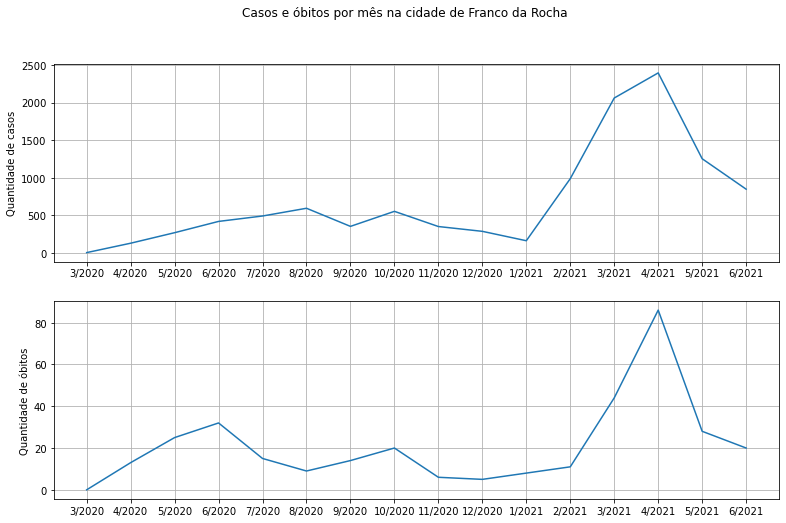

In [52]:
plt.rcParams['figure.figsize'] = (13,8)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(lista_data_fr, lista_casos_fr)
ax1.set_ylabel('Quantidade de casos')
ax2.plot(lista_data_fr, lista_obitos_fr)
ax2.set_ylabel('Quantidade de óbitos')
fig.suptitle('Casos e óbitos por mês na cidade de Franco da Rocha')
ax1.grid(True)
ax2.grid(True)

- ***Criação dos Gráficos da quantidade acumulada de casos e de óbitos do município de Franco da Rocha - SP.***

Looping para criação da coluna de casos acumulados

In [53]:
i = 1
acumulado_casos_fr = []
acumulado_casos_fr.append(lista_casos_fr[0])
while i < len(lista_casos_fr):
    acumulado_casos_fr.append(lista_casos_fr[i]+acumulado_casos_fr[i-1])
    i +=1
print(acumulado_casos_fr)

[3, 131, 399, 817, 1307, 1900, 2252, 2804, 3154, 3440, 3601, 4588, 6648, 9042, 10294, 11141]


Looping para criação da coluna de óbitos acumulados

In [54]:
i = 1
acumulado_obitos_fr = []
acumulado_obitos_fr.append(lista_obitos_fr[0])
while i < len(lista_obitos_fr):
    acumulado_obitos_fr.append(lista_obitos_fr[i]+acumulado_obitos_fr[i-1])
    i +=1
print(acumulado_obitos_fr)

[0, 13, 38, 70, 85, 94, 108, 128, 134, 139, 147, 158, 202, 288, 316, 336]


Criação dos Gráficos Acumulados de Casos e de Óbitos na cidade de Osasco

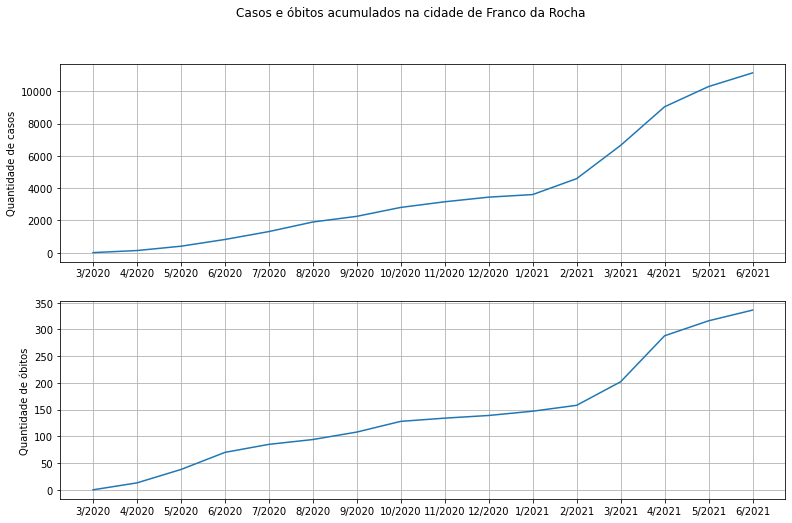

In [55]:
plt.rcParams['figure.figsize'] = (13,8)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(lista_data_fr, acumulado_casos_fr)
ax1.set_ylabel('Quantidade de casos')
ax2.plot(lista_data_fr, acumulado_obitos_fr)
ax2.set_ylabel('Quantidade de óbitos')
fig.suptitle('Casos e óbitos acumulados na cidade de Franco da Rocha')
ax1.grid(True)
ax2.grid(True)

- ***Estatísticas básicas da quantidade de casos e de óbitos do município de Franco da Rocha - SP.***

Média mensal da quantidade de casos

In [56]:
statistics.mean(lista_casos_fr)

696.3125

Média mensal da quantidade de óbitos

In [57]:
statistics.mean(lista_obitos_fr)

21

Total de casos e óbitos confirmados

In [93]:
casos_total_fr = acumulado_casos_fr[-1]
obitos_total_fr = acumulado_obitos_fr[-1]

print(casos_total_fr)
print(obitos_total_fr)

11141
336


% da população que contraiu COVID-19

In [59]:
risco_caso_fr = (casos_total_fr / pop_cidade_fr) * 100
risco_caso_fr

7.211516677562805

Cálculo da Mortalidade

In [60]:
mortalidade_fr = (obitos_total_fr / pop_cidade_fr) * 100
mortalidade_fr

0.217491212966619

Cálculo da Letalidade

In [61]:
letalidade_fr = (obitos_total_fr / casos_total_fr) * 100
letalidade_fr

3.0158872632618254

<h3>Análise de Dados da Cidade de Bragança Paulista - SP</h3>

- ***Criação dos Gráficos da quantidade de casos e de óbitos do município de Bragança Paulista - SP.***

Extração dos dados de óbitos direto do Banco de Dados e criação de campos extras para a visualização mensal dos dados.

In [62]:
bp_obitos = "SELECT EXTRACT(MONTH FROM data_dado) as mes, EXTRACT(YEAR FROM data_dado) as ano, SUM(novos_obitos) FROM obitos AS o, data_dado AS d, cidade as c WHERE o.id_data_dado = d.id_data_dado AND o.id_cidade = c.id_cidade AND nome_cidade = 'Bragança Paulista' GROUP BY EXTRACT(MONTH FROM data_dado), EXTRACT(YEAR FROM data_dado) ORDER BY 2,1;"
cursor.execute(bp_obitos)
bp_obitos = cursor.fetchall()
lista_data_bp = []
lista_obitos_bp = []
for item in bp_obitos:
    data_str = str(int(item[0]))+'/'+str(int(item[1]))
    lista_data_bp.append(data_str)
    lista_obitos_bp.append(item[2])

Extração dos dados de casos direto do Banco de Dados

In [63]:
bp_casos = "SELECT EXTRACT(MONTH FROM data_dado) as mes, EXTRACT(YEAR FROM data_dado) as ano, SUM(novos_casos) FROM casos AS o, data_dado AS d, cidade as c WHERE o.id_data_dado = d.id_data_dado AND o.id_cidade = c.id_cidade AND nome_cidade = 'Bragança Paulista' GROUP BY EXTRACT(MONTH FROM data_dado), EXTRACT(YEAR FROM data_dado) ORDER BY 2,1;"
cursor.execute(bp_casos)
bp_casos = cursor.fetchall()
lista_data_bp = []
lista_casos_bp = []
for item in bp_casos:
    data_str = str(int(item[0]))+'/'+str(int(item[1]))
    lista_data_bp.append(data_str)
    lista_casos_bp.append(item[2])

Criação dos Gráficos de Casos e de Óbitos na cidade de Bragança Paulista

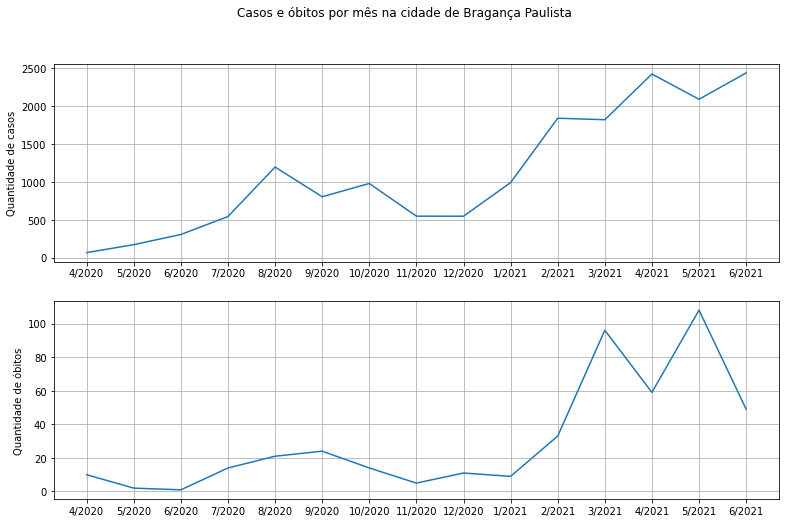

In [64]:
plt.rcParams['figure.figsize'] = (13,8)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(lista_data_bp, lista_casos_bp)
ax1.set_ylabel('Quantidade de casos')
ax2.plot(lista_data_bp, lista_obitos_bp)
ax2.set_ylabel('Quantidade de óbitos')
fig.suptitle('Casos e óbitos por mês na cidade de Bragança Paulista')
ax1.grid(True)
ax2.grid(True)

- ***Criação dos Gráficos da quantidade acumulada de casos e de óbitos do município de Bragança Paulista - SP.***

Looping para criação da coluna de casos acumulados

In [65]:
i = 1
acumulado_casos_bp = []
acumulado_casos_bp.append(lista_casos_bp[0])
while i < len(lista_casos_bp):
    acumulado_casos_bp.append(lista_casos_bp[i]+acumulado_casos_bp[i-1])
    i +=1
print(acumulado_casos_bp)

[65, 235, 539, 1080, 2274, 3076, 4053, 4599, 5144, 6133, 7971, 9789, 12210, 14298, 16734]


Looping para criação da coluna de óbitos acumulados

In [66]:
i = 1
acumulado_obitos_bp = []
acumulado_obitos_bp.append(lista_obitos_bp[0])
while i < len(lista_obitos_bp):
    acumulado_obitos_bp.append(lista_obitos_bp[i]+acumulado_obitos_bp[i-1])
    i +=1
print(acumulado_obitos_bp)

[10, 12, 13, 27, 48, 72, 86, 91, 102, 111, 144, 240, 299, 407, 456]


Criação dos Gráficos Acumulados de Casos e de Óbitos na cidade de Bragança Paulista

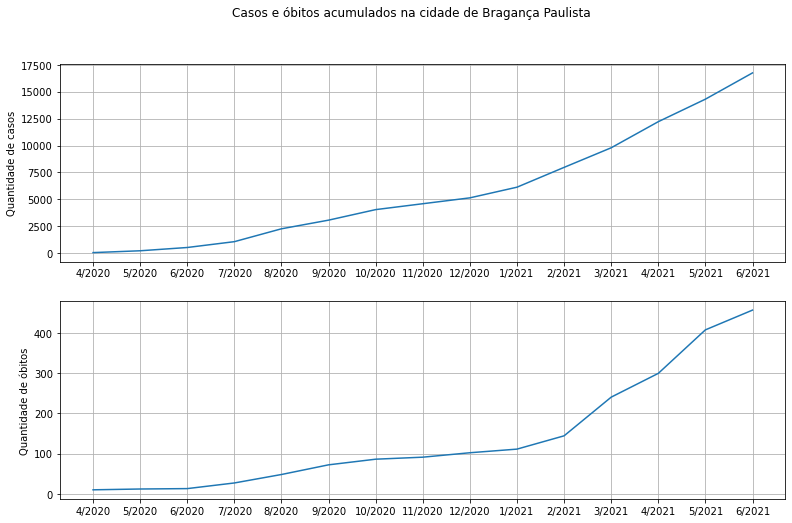

In [67]:
plt.rcParams['figure.figsize'] = (13,8)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(lista_data_bp, acumulado_casos_bp)
ax1.set_ylabel('Quantidade de casos')
ax2.plot(lista_data_bp, acumulado_obitos_bp)
ax2.set_ylabel('Quantidade de óbitos')
fig.suptitle('Casos e óbitos acumulados na cidade de Bragança Paulista')
ax1.grid(True)
ax2.grid(True)

- ***Estatísticas básicas da quantidade de casos e de óbitos do município de Bragança Paulista - SP.***

Média mensal da quantidade de casos

In [68]:
statistics.mean(lista_casos_bp)

1115.6

Média mensal da quantidade de óbitos

In [69]:
statistics.mean(lista_obitos_bp)

30.4

Total de casos e óbitos confirmados

In [94]:
casos_total_bp = acumulado_casos_bp[-1]
obitos_total_bp = acumulado_obitos_bp[-1]

print(casos_total_bp)
print(obitos_total_bp)

16734
456


% da população que contraiu COVID-19

In [71]:
risco_caso_bp = (casos_total_bp / pop_cidade_bp) * 100
risco_caso_bp

9.921265444541941

Cálculo da Mortalidade

In [72]:
mortalidade_bp = (obitos_total_bp / pop_cidade_bp) * 100
mortalidade_bp

0.27035359404273485

Cálculo da Letalidade

In [73]:
letalidade_bp = (obitos_total_bp / casos_total_bp) * 100
letalidade_bp

2.7249910362136966

<h3>Questões sobre a Análise</h3>

- **Qual o nível de risco de cada cidade?**

A cidade de Atibaia teve até o dia 24/06/2021 um total de 10.425 casos e 238 óbitos confirmados de COVID-19. A cidade tem em média 695 casos e 16 óbitos por mês. Atualmente, 7,30% da sua população contraiu COVID-19. A taxa de mortalidade é de 0,17% e a taxa de letalidade é de 2,28%. A taxa de letalidade é menor do que a do Estado de São Paulo (3,4%). Olhando graficamente, o pior momento da pandemia para esta cidade foi no mês de Março/21, onde a elevação de casos e óbitos chegou ao pico máximo.

A cidade de Bragança Paulista teve até o dia 24/06/2021 um total de 16.734 casos e 456 óbitos confirmados de COVID-19. A cidade tem em média 1.116 casos e 30 óbitos por mês. Atualmente, 9,92% da sua população contraiu COVID-19. A taxa de mortalidade é de 0,22% e a taxa de letalidade é de 2,72%. A taxa de letalidade é menor do que a do Estado de São Paulo (3,4%). Olhando graficamente, o pior momento da pandemia para esta cidade foram nos meses de Maio e Junho/21, onde a elevação de casos e óbitos chegou ao pico máximo.

A cidade de Franco da Rocha teve até o dia 24/06/2021 um total de 11.141 casos e 336 óbitos confirmados de COVID-19. A cidade tem em média 696 casos e 21 óbitos por mês. Atualmente, 7,21% da sua população contraiu COVID-19. A taxa de mortalidade é de 0,27% e a taxa de letalidade é de 3,01%. A taxa de letalidade é menor do que a do Estado de São Paulo (3,4%). Olhando graficamente, o pior momento da pandemia para esta cidade foi no mês de Abril/21, onde a elevação de casos e óbitos chegou ao pico máximo.

A cidade de Guarulhos teve até o dia 24/06/2021 um total de 57.158 casos e 4.257 óbitos confirmados de COVID-19. A cidade tem em média 3.572 casos e 266 óbitos por mês. Atualmente, 4,14% da sua população contraiu COVID-19. A taxa de mortalidade é de 0,31% e a taxa de letalidade é de 7,45%. A taxa de letalidade é maior do que a do Estado de São Paulo (3,4%). Olhando graficamente, o pior momento da pandemia para esta cidade foi no mês de Abril/21, onde a elevação de casos e óbitos chegou ao pico máximo.

A cidade de Osasco teve até o dia 24/06/2021 um total de 38.969 casos e 2.227 óbitos confirmados de COVID-19. A cidade tem em média 2.436 casos e 139 óbitos por mês. Atualmente, 5,58% da sua população contraiu COVID-19. A taxa de mortalidade é de 0,32% e a taxa de letalidade é de 5,71%. A taxa de letalidade é maior do que a do Estado de São Paulo (3,4%). Olhando graficamente, o pior momento da pandemia para esta cidade foi no mês de Abril/21, onde a elevação de óbitos chegou ao pico máximo.

Olhando estes indicadores, podemos afirmar que a cidade mais arriscada para se contrair COVID-19 é o município de Guarulhos. Com uma taxa de letalidade mais alta do que as outras cidades, podemos aferir que o seu sistema de saúde está sobrecarregado devido a pandemia, gerando uma impossibilidade de assistência e de tratamento para os enfermos.

- **Quais medidas de prevenção deveriam ser aplicadas em cada cidade?**

Para as cidades de Atibaia, Bragança Paulista e Franco da Rocha, as principais medidas que devem ser tomadas são: a implantação de isolamento social mais restrito que evite a presença e a movimentação de pessoas vindas da Capital de São Paulo, local onde existe uma concentração muito grande de casos; conscientização da população para que utilizem máscaras PFF2 / N95 e incentivo para a redução das aglomerações. Nestas cidades a pandemia está um pouco mais controlada.

Já para as cidades de Guarulhos e Osasco, além das medidas básicas de controle, higiene e redução de aglomerações, é necessário ter testagem em massa e uma campanha estruturada de vacinação, pois apenas o distanciamento não é suficiente para conter os casos de COVID-19 destes grandes centros. 

- **Dentre estas cidades, quais devem ter prioridade na alocação de recursos para o combate à COVID19?**

As cidades que devem ter prioridade na alocação de recursos para o combate ao COVID-19 são as cidades que a situação da pandemia está mais descontrolada conforme os indicadores, no caso desta análise, Guarulhos e Osasco. Os indicadores de letalidade destas cidades são maiores do que o a média do Estado de SP. Além disso, notamos no gráfico abaixo que estas duas cidades atualmente são as líderes no número de casos:

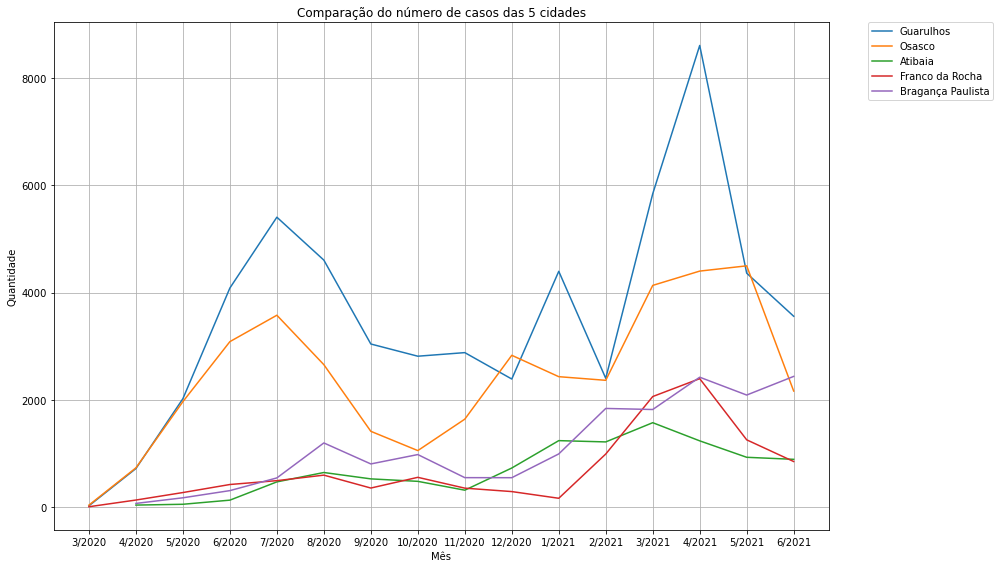

In [51]:
plt.rcParams['figure.figsize'] = (14,8)
fig, ax = plt.subplots(1, 1)
ax.plot(lista_data_guarulhos, lista_casos_guarulhos, label = "Guarulhos")
ax.plot(lista_data_oz, lista_casos_oz, label = "Osasco")
ax.plot(lista_data_atibaia, lista_casos_atibaia, label = "Atibaia")
ax.plot(lista_data_fr, lista_casos_fr, label = "Franco da Rocha")
ax.plot(lista_data_bp, lista_casos_bp, label = "Bragança Paulista")
ax.set(xlabel='Mês', ylabel='Quantidade', title='Comparação do número de casos das 5 cidades')
#ax.legend([lista_casos_oz, lista_casos_atibaia], ['Osasco', 'Atibaia'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.grid(True)
fig.tight_layout()